# Data Processing

In [1]:
import random
from PIL import Image
import numpy as np

In [39]:
# Create and save a tensor with 1500 labeled data points
    # Xtr: [ 1500, 64 ]
    # Ytr: [ 1500, 4 ]

def generate_section(img, img_down):
    width, height = img.size
    start_x = random.randrange(0,width-8)
    start_y = random.randrange(0,height-8)
    data = list(img.getdata())
    data = [data[i*width:(i+1)*width] for i in range(height)]
    section = []
    for x in range(start_x,start_x+8):
        for y in range(start_y,start_y+8):
            section += [data[x][y][:3]]
    return section

In [50]:
img = Image.open('data\\train_zip\\train\\apple_4.jpg')
img_down = Image.open('data\\train_zip\\train\\apple_4-down.jpg')

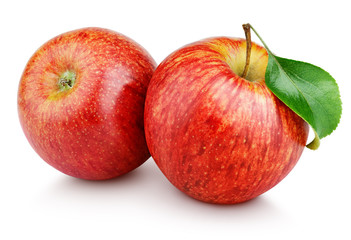

In [53]:
np.asarray(img)
Image.fromarray(np.asarray(img))

In [54]:
s = generate_section(img,img_down)
arr = np.array(s).reshape(8,8,3)
print(arr.reshape(8,8,3))
section = Image.fromarray(arr.reshape(8,8,3))
section

[[[233 170 137]
  [237 130 114]
  [236 131 109]
  [236 122 112]
  [222  96  99]
  [236 127 120]
  [242 162 135]
  [240 146 118]]

 [[229 143 118]
  [236 118 104]
  [236 134 111]
  [240 129 118]
  [211  91  92]
  [221 125 113]
  [231 168 133]
  [226 146 109]]

 [[234 124 107]
  [226 105  96]
  [242 122 105]
  [225 135 111]
  [227 104  97]
  [222  89  84]
  [234 121 103]
  [220 125  95]]

 [[241 134 114]
  [236 109 100]
  [240 114  99]
  [233 132 112]
  [228 101  94]
  [224  87  81]
  [239 116 101]
  [243 139 114]]

 [[235 129 107]
  [229 112  95]
  [226  96  82]
  [233 121 101]
  [229 101  90]
  [224  85  78]
  [222  85  77]
  [227 110  93]]

 [[235 125 102]
  [231 131 107]
  [236 117  97]
  [231 116  95]
  [223 104  84]
  [225  93  80]
  [224  80  72]
  [220  87  78]]

 [[234 120  96]
  [236 134 109]
  [239 130 107]
  [232 118  92]
  [228 129  97]
  [230 114  89]
  [232  83  77]
  [216  73  69]]

 [[227 113  87]
  [237 115  94]
  [223 117  93]
  [231 111  86]
  [233 149 105]
  [228 130

TypeError: Cannot handle this data type: (1, 1, 3), <i4